In [3]:
import numpy as np 
import pandas as pd 
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
from sklearn.decomposition import PCA 
from sklearn.decomposition import SparsePCA 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics.pairwise import polynomial_kernel 
from sklearn.metrics.pairwise import rbf_kernel 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [4]:
player = pd.read_csv("players.csv") 
allstar = pd.read_csv("allstar.csv")
player = player[1321:9075]

#fix the season column

player['season'] = player['season'].replace(
    ['1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', 
     '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', 
     '2013-14', '2014-15', '2015-16'], 
    [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 
    2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [5]:
player

Unnamed: 0       player_name team_abbreviation   age  player_height  \
1321        1321     Doug Christie               TOR  30.0         198.12   
1322        1322      Doug Overton               BOS  30.0         190.50   
1323        1323         Doug West               VAN  33.0         198.12   
1324        1324        Drew Barry               ATL  27.0         195.58   
1325        1325    Duane Causwell               MIA  32.0         213.36   
...          ...               ...               ...   ...            ...   
9070        9070       Greg Monroe               MIL  26.0         210.82   
9071        9071        Greg Smith               MIN  25.0         208.28   
9072        9072     Zaza Pachulia               DAL  32.0         210.82   
9073        9073      Gorgui Dieng               MIN  26.0         210.82   
9074        9074  Gerald Henderson               POR  28.0         195.58   

      player_weight       college  country draft_year draft_round  ...   pts  \
1321      92.986360    Pepperdine      USA       1992           1  ...  12.4   
1322      86.182480      La Salle      USA       1991           2  ...   3.2   
1323      99.790240     Villanova      USA       1989           2  ...   4.0   
1324      86.636072  Georgia Tech      USA       1996           2  ...   2.6   
1325     115.665960        Temple      USA       1990           1  ...   2.6   
...             ...           ...      ...        ...         ...  ...   ...   
9070     120.201880    Georgetown      USA       2010           1  ...  15.3   
9071     113.398000  Fresno State      USA  Undrafted   Undrafted  ...   2.4   
9072     124.737800          None  Georgia       2003           2  ...   8.6   
9073     109.315672    Louisville  Senegal       2013           1  ...  10.1   
9074      97.522280          Duke      USA       2009           1  ...   8.7   

      reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
1321  3.9  4.4         0.3     0.030     0.112    0.194   0.526    0.227   
1322  0.7  1.1        -2.9     0.035     0.050    0.185   0.466    0.205   
1323  1.9  1.1         3.2     0.038     0.109    0.144   0.467    0.123   
1324  0.8  2.1        -9.6     0.000     0.078    0.132   0.582    0.330   
1325  1.9  0.1       -14.9     0.064     0.200    0.154   0.614    0.017   
...   ...  ...         ...       ...       ...      ...     ...      ...   
9070  8.8  2.3        -2.7     0.109     0.239    0.234   0.562    0.128   
9071  2.3  0.3       -17.8     0.069     0.186    0.108   0.545    0.049   
9072  9.4  1.7         0.9     0.137     0.262    0.164   0.550    0.101   
9073  7.1  1.7         0.8     0.086     0.222    0.169   0.601    0.099   
9074  2.9  1.0         1.6     0.023     0.137    0.203   0.526    0.084   

      season  
1321    2000  
1322    2000  
1323    2000  
1324    2000  
1325    2000  
...      ...  
9070    2016  
9071    2016  
9072    2016  
9073    2016  
9074    2016  

[7754 rows x 22 columns]

In [6]:
# make separate datas 
player_2000 = player[player['season'] == 2000]
player_2001 = player[player['season'] == 2001]
player_2002 = player[player['season'] == 2002]
player_2003 = player[player['season'] == 2003]
player_2004 = player[player['season'] == 2004]
player_2005 = player[player['season'] == 2005]
player_2006 = player[player['season'] == 2006]
player_2007 = player[player['season'] == 2007]
player_2008 = player[player['season'] == 2008]
player_2009 = player[player['season'] == 2009]
player_2010 = player[player['season'] == 2010]
player_2011 = player[player['season'] == 2011]
player_2012 = player[player['season'] == 2012]
player_2013 = player[player['season'] == 2013]
player_2014 = player[player['season'] == 2014]
player_2015 = player[player['season'] == 2015]
player_2016 = player[player['season'] == 2016]

#allstar data for 16 years 
allstar_2000 = allstar[allstar['Year'] == 2000]
allstar_2001 = allstar[allstar['Year'] == 2001]
allstar_2002 = allstar[allstar['Year'] == 2002]
allstar_2003 = allstar[allstar['Year'] == 2003]
allstar_2004 = allstar[allstar['Year'] == 2004]
allstar_2005 = allstar[allstar['Year'] == 2005]
allstar_2006 = allstar[allstar['Year'] == 2006]
allstar_2007 = allstar[allstar['Year'] == 2007]
allstar_2008 = allstar[allstar['Year'] == 2008]
allstar_2009 = allstar[allstar['Year'] == 2009]
allstar_2010 = allstar[allstar['Year'] == 2010] 
allstar_2011 = allstar[allstar['Year'] == 2011] 
allstar_2012 = allstar[allstar['Year'] == 2012] 
allstar_2013 = allstar[allstar['Year'] == 2013] 
allstar_2014 = allstar[allstar['Year'] == 2014] 
allstar_2015 = allstar[allstar['Year'] == 2015] 
allstar_2016 = allstar[allstar['Year'] == 2016] 

player_2000["allstar"] = player_2000.player_name.isin(allstar_2000.Player).astype(int) 
player_2001["allstar"] = player_2001.player_name.isin(allstar_2001.Player).astype(int) 
player_2002["allstar"] = player_2002.player_name.isin(allstar_2002.Player).astype(int) 
player_2003["allstar"] = player_2003.player_name.isin(allstar_2003.Player).astype(int) 
player_2004["allstar"] = player_2004.player_name.isin(allstar_2004.Player).astype(int) 
player_2005["allstar"] = player_2005.player_name.isin(allstar_2005.Player).astype(int) 
player_2006["allstar"]= player_2006.player_name.isin(allstar_2006.Player).astype(int) 
player_2007["allstar"] = player_2007.player_name.isin(allstar_2007.Player).astype(int) 
player_2008["allstar"] = player_2008.player_name.isin(allstar_2008.Player).astype(int) 
player_2009["allstar"] = player_2009.player_name.isin(allstar_2009.Player).astype(int) 
player_2010["allstar"] = player_2010.player_name.isin(allstar_2010.Player).astype(int) 
player_2011["allstar"] = player_2011.player_name.isin(allstar_2011.Player).astype(int) 
player_2012["allstar"] = player_2012.player_name.isin(allstar_2012.Player).astype(int) 
player_2013["allstar"] = player_2013.player_name.isin(allstar_2013.Player).astype(int) 
player_2014["allstar"] = player_2014.player_name.isin(allstar_2014.Player).astype(int) 
player_2015["allstar"] = player_2015.player_name.isin(allstar_2015.Player).astype(int) 
player_2016["allstar"] = player_2016.player_name.isin(allstar_2016.Player).astype(int) 

player_2000as = player_2000[player_2000['allstar'] == 1]
player_2001as = player_2001[player_2001['allstar'] == 1]
player_2002as = player_2002[player_2002['allstar'] == 1]
player_2003as = player_2003[player_2003['allstar'] == 1]
player_2004as = player_2004[player_2004['allstar'] == 1]
player_2005as = player_2005[player_2005['allstar'] == 1]
player_2006as = player_2006[player_2006['allstar'] == 1]
player_2007as = player_2007[player_2007['allstar'] == 1]
player_2008as = player_2008[player_2008['allstar'] == 1]
player_2009as = player_2009[player_2009['allstar'] == 1]
player_2010as = player_2010[player_2010['allstar'] == 1]
player_2011as = player_2011[player_2011['allstar'] == 1]
player_2012as = player_2012[player_2012['allstar'] == 1]
player_2013as = player_2013[player_2013['allstar'] == 1]
player_2014as = player_2014[player_2014['allstar'] == 1]
player_2015as = player_2015[player_2015['allstar'] == 1]
player_2016as = player_2016[player_2016['allstar'] == 1]

C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [7]:
players_data = pd.concat([player_2000, player_2001, player_2002, 
                       player_2003, player_2004, player_2005, 
                       player_2006, player_2007, player_2008, 
                       player_2009, player_2010, player_2011, 
                       player_2012, player_2013, player_2014, 
                       player_2015, player_2016], axis = 0)
final_data = pd.concat([player_2000as, player_2001as, player_2002as, 
                       player_2003as, player_2004as, player_2005as, 
                       player_2006as, player_2007as, player_2008as, 
                       player_2009as, player_2010as, player_2011as, 
                       player_2012as, player_2013as, player_2014as, 
                       player_2015as, player_2016as], axis = 0)
final_data = final_data.reset_index(drop = True) 

In [20]:
players_data

Unnamed: 0       player_name team_abbreviation   age  player_height  \
1321        1321     Doug Christie               TOR  30.0         198.12   
1322        1322      Doug Overton               BOS  30.0         190.50   
1323        1323         Doug West               VAN  33.0         198.12   
1324        1324        Drew Barry               ATL  27.0         195.58   
1325        1325    Duane Causwell               MIA  32.0         213.36   
...          ...               ...               ...   ...            ...   
9070        9070       Greg Monroe               MIL  26.0         210.82   
9071        9071        Greg Smith               MIN  25.0         208.28   
9072        9072     Zaza Pachulia               DAL  32.0         210.82   
9073        9073      Gorgui Dieng               MIN  26.0         210.82   
9074        9074  Gerald Henderson               POR  28.0         195.58   

      player_weight       college  country draft_year draft_round  ...  reb  \
1321      92.986360    Pepperdine      USA       1992           1  ...  3.9   
1322      86.182480      La Salle      USA       1991           2  ...  0.7   
1323      99.790240     Villanova      USA       1989           2  ...  1.9   
1324      86.636072  Georgia Tech      USA       1996           2  ...  0.8   
1325     115.665960        Temple      USA       1990           1  ...  1.9   
...             ...           ...      ...        ...         ...  ...  ...   
9070     120.201880    Georgetown      USA       2010           1  ...  8.8   
9071     113.398000  Fresno State      USA  Undrafted   Undrafted  ...  2.3   
9072     124.737800          None  Georgia       2003           2  ...  9.4   
9073     109.315672    Louisville  Senegal       2013           1  ...  7.1   
9074      97.522280          Duke      USA       2009           1  ...  2.9   

      ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
1321  4.4         0.3     0.030     0.112    0.194   0.526    0.227    2000   
1322  1.1        -2.9     0.035     0.050    0.185   0.466    0.205    2000   
1323  1.1         3.2     0.038     0.109    0.144   0.467    0.123    2000   
1324  2.1        -9.6     0.000     0.078    0.132   0.582    0.330    2000   
1325  0.1       -14.9     0.064     0.200    0.154   0.614    0.017    2000   
...   ...         ...       ...       ...      ...     ...      ...     ...   
9070  2.3        -2.7     0.109     0.239    0.234   0.562    0.128    2016   
9071  0.3       -17.8     0.069     0.186    0.108   0.545    0.049    2016   
9072  1.7         0.9     0.137     0.262    0.164   0.550    0.101    2016   
9073  1.7         0.8     0.086     0.222    0.169   0.601    0.099    2016   
9074  1.0         1.6     0.023     0.137    0.203   0.526    0.084    2016   

      allstar  
1321        0  
1322        0  
1323        0  
1324        0  
1325        0  
...       ...  
9070        0  
9071        0  
9072        0  
9073        0  
9074        0  

[7754 rows x 23 columns]

In [8]:
players_stats = players_data.drop(["season", "draft_number", "draft_round", "college", "country","Unnamed: 0", "team_abbreviation", "draft_year"], axis = 1)
allstar_stats = final_data.drop(["season", "draft_number", "draft_round", "college", "country","Unnamed: 0", "team_abbreviation", "draft_year"], axis = 1) 

In [21]:
Y = players_stats["allstar"]
X = players_stats.drop(['allstar'], axis = 1)
X = X.drop('player_name', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [22]:
# Model 1 - No transformations, Logistic Regression 

m1_pipeline = sklearn.pipeline.Pipeline([
    ('classifier', LogisticRegression())
])

m1_paramgrid = dict()
m1_paramgrid['classifier__penalty'] = ['l1', '12']
m1_paramgrid['classifier__solver'] = ['liblinear', 'saga']
m1_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs1 = GridSearchCV( 
    m1_pipeline, 
    m1_paramgrid,  
    scoring = 'accuracy')


gs1_results = gs1.fit(x_train, y_train)
print(gs1_results.best_score_)
print(gs1_results.best_params_)

C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib

0.9638890332978087
{'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [23]:
%%time
m1_best_pipeline = sklearn.pipeline.Pipeline([
    ('classifier', LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear'))
])

m1_best_pipeline.fit(x_train, y_train) 
m1_pred = m1_best_pipeline.predict(x_test) 
m1_acc = accuracy_score(m1_pred, y_test)
print(m1_acc)



0.9600257898130239
Wall time: 201 ms


In [24]:
#Model 2 - standard scaled data, Logistic Regression
#scale data with the Standard Scaler 

m2_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())
])

m2_paramgrid = dict()
m2_paramgrid['scaler__with_mean'] = [True, False]
m2_paramgrid['scaler__with_std'] = [True, False]
m2_paramgrid['classifier__penalty'] = ['l1', '12']
m2_paramgrid['classifier__solver'] = ['liblinear', 'saga']
m2_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs2 = GridSearchCV( 
    m2_pipeline, 
    m2_paramgrid, 
    scoring = 'accuracy')

gs2_results = gs2.fit(x_train, y_train)
print(gs2_results.best_score_)
print(gs2_results.best_params_)

C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib

0.9645338046840477
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'scaler__with_mean': False, 'scaler__with_std': True}


In [25]:
%%time
m2_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = False, with_std = True)),
    ('classifier', LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear'))
])

m2_best_pipeline.fit(x_train, y_train) 
m2_pred = m2_best_pipeline.predict(x_test) 
m2_acc = accuracy_score(m2_pred, y_test)
print(m2_acc)

0.9593810444874274
Wall time: 1.12 s


In [26]:
#Model3 - standard vector classifier on scaled data 
m3_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', SVC())
])

m3_paramgrid = dict()
m3_paramgrid['scaler__with_mean'] = [True, False]
m3_paramgrid['classifier__gamma'] = [0.001, 0.01, 0.1, 1, 10]
m3_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs3 = GridSearchCV( 
    m3_pipeline, 
    m3_paramgrid, 
    scoring = 'accuracy')

gs3_results = gs3.fit(x_train,y_train)
print(gs3_results.best_score_)
print(gs3_results.best_params_)

0.96582308752047
{'classifier__C': 100, 'classifier__gamma': 0.001, 'scaler__with_mean': True}


In [27]:
%%time
m3_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('classifier', SVC(C = 100, gamma = 0.001))
])

m3_best_pipeline.fit(x_train, y_train) 
m3_pred = m3_best_pipeline.predict(x_test) 
m3_acc = accuracy_score(m3_pred, y_test)
print(m3_acc)

0.9606705351386202
Wall time: 171 ms


In [28]:
#Model4 - standard vector classifier on PCA

m4_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

m4_paramgrid = dict()
m4_paramgrid['scaler__with_mean'] = [True, False]
m4_paramgrid['pca__n_components'] = [1,2,3,4,5]
m4_paramgrid['classifier__gamma'] = [0.001, 0.01, 0.1, 1, 10]
m4_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs4 = GridSearchCV( 
    m4_pipeline, 
    m4_paramgrid, 
    scoring = 'accuracy')

gs4_results = gs4.fit(x_train, y_train)
print(gs4_results.best_score_)
print(gs4_results.best_params_)

0.9640499337163057
{'classifier__C': 100, 'classifier__gamma': 0.001, 'pca__n_components': 4, 'scaler__with_mean': True}


In [29]:
%%time
m4_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('pca', PCA(n_components = 4)), 
    ('classifier', SVC(C = 100, gamma = 0.001))
])

m4_best_pipeline.fit(x_train, y_train) 
m4_pred = m4_best_pipeline.predict(x_test) 
m4_acc = accuracy_score(m4_pred, y_test)
print(m4_acc)

0.9613152804642167
Wall time: 175 ms


In [30]:
%%time
m5_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('spca', SparsePCA(n_components = 4, )), 
    ('classifier', SVC(C = 100, gamma = 0.001))
])

m5_best_pipeline.fit(x_train, y_train) 
m5_pred = m5_best_pipeline.predict(x_test) 
m5_acc = accuracy_score(m5_pred, y_test)
print(m5_acc)

0.9613152804642167
Wall time: 4.33 s


In [31]:
%%time
m6_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('spca', SparsePCA(n_components = 4, )), 
    ('classifier', LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear'))
])

m6_best_pipeline.fit(x_train, y_train) 
m6_pred = m6_best_pipeline.predict(x_test) 
m6_acc = accuracy_score(m6_pred, y_test)
print(m6_acc)

0.9606705351386202
Wall time: 4.19 s


In [32]:
all_x = allstar_stats.drop(["player_name", "allstar"], axis = 1)

Text(0.5, 1.0, 'Height vs. Weight')

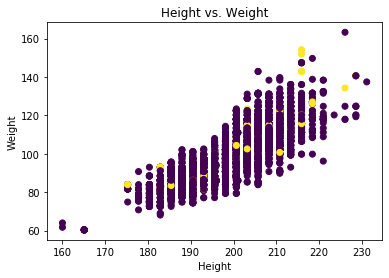

In [33]:
#plot all data 
plt.scatter(players_data['player_height'], players_data['player_weight'], c = players_data['allstar'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')


Text(0.5, 1.0, 'Age vs. Net Rating')

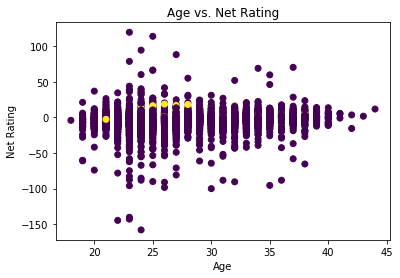

In [34]:
plt.scatter(players_data['age'], players_data['net_rating'], c = players_data['allstar'])
plt.xlabel('Age')
plt.ylabel('Net Rating')
plt.title('Age vs. Net Rating')

Text(0.5, 1.0, 'Points vs. Assists')

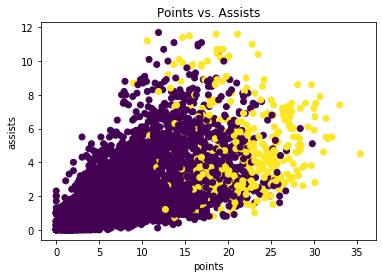

In [35]:
plt.scatter(players_data['pts'], players_data['ast'], c = players_data['allstar'])
plt.xlabel('points')
plt.ylabel('assists')
plt.title('Points vs. Assists')

In [36]:
# Model1 - PCA 
scaler = StandardScaler() 
x_scaled_train = scaler.fit_transform(all_x) 
pca = PCA(n_components = 2) 
x_pca = pca.fit_transform(x_scaled_train) 

In [37]:
pca.components_

array([[ 0.00419027,  0.39249614,  0.37076694, -0.02828956, -0.10930205,
         0.37421295, -0.35852624, -0.01029098,  0.37423321,  0.37849418,
        -0.1038836 ,  0.02662549, -0.36362411],
       [ 0.01531794, -0.11172246, -0.15361607, -0.13159681, -0.66596483,
        -0.13122325, -0.02850694, -0.21579901,  0.05637276, -0.08826882,
        -0.59116213, -0.27397064, -0.05249228]])

In [38]:
pca.explained_variance_ratio_

array([0.41023613, 0.14437877])

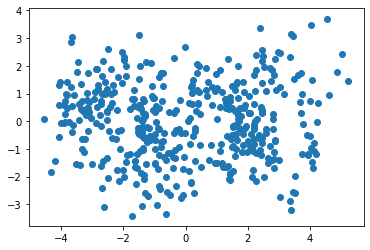

In [39]:
# plot PCA 
plt.scatter(x_pca[:,0], x_pca[:,1])

In [40]:
# implement K-means 
cluster = KMeans(n_clusters = 8, random_state = 42) 
cluster.fit(x_pca) 

cluster_means = cluster.predict(x_pca)

Text(0.5, 1.0, 'PCA of All-Star Players')

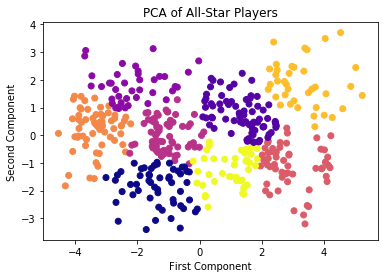

In [41]:
#graph of K-means with regular PCA 
plt.scatter(x_pca[:,0],x_pca[:,1] , c=cluster_means, cmap = 'plasma')
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA of All-Star Players")

In [42]:
# add cluster number to player data 
allstar_stats['cluster'] = cluster.labels_

In [43]:
allstar_stats[allstar_stats["cluster"] == 5]

player_name   age  player_height  player_weight  gp   pts  reb   ast  \
3        Gary Payton  31.0         193.04      81.646560  82  24.2  6.5   8.9   
10     Allen Iverson  25.0         182.88      74.842680  70  28.4  3.8   4.7   
17   Stephon Marbury  23.0         187.96      81.646560  74  22.2  3.2   8.4   
32       Gary Payton  32.0         193.04      81.646560  79  23.1  4.6   8.1   
35     Allen Iverson  26.0         182.88      74.842680  71  31.1  3.8   4.6   
..               ...   ...            ...            ...  ..   ...  ...   ...   
410     Kyrie Irving  24.0         190.50      87.543256  53  19.6  3.0   4.7   
413       Kyle Lowry  30.0         182.88      92.986360  77  21.2  4.7   6.4   
418    Isaiah Thomas  27.0         175.26      83.914520  82  22.2  3.0   6.2   
420     Kemba Walker  26.0         185.42      83.460928  81  20.9  4.4   5.2   
424        John Wall  25.0         193.04      88.450440  77  19.9  4.9  10.2   

     net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  allstar  \
3           2.9     0.032     0.139    0.268   0.535    0.368        1   
10          1.2     0.027     0.078    0.339   0.496    0.220        1   
17          0.0     0.022     0.071    0.277   0.528    0.380        1   
32         -0.6     0.025     0.101    0.270   0.522    0.364        1   
35          5.7     0.019     0.081    0.354   0.518    0.226        1   
..          ...       ...       ...      ...     ...      ...      ...   
410         5.7     0.030     0.078    0.293   0.540    0.253        1   
413         6.0     0.023     0.124    0.260   0.578    0.293        1   
418         3.7     0.018     0.080    0.293   0.562    0.312        1   
420         4.2     0.021     0.116    0.265   0.554    0.253        1   
424         0.7     0.017     0.138    0.284   0.510    0.449        1   

     cluster  
3          5  
10         5  
17         5  
32         5  
35         5  
..       ...  
410        5  
413        5  
418        5  
420        5  
424        5  

[61 rows x 16 columns]

In [44]:
# Model2 - Sparse PCA 

spca = SparsePCA(n_components = 2) 
x_spca = spca.fit_transform(x_scaled_train)

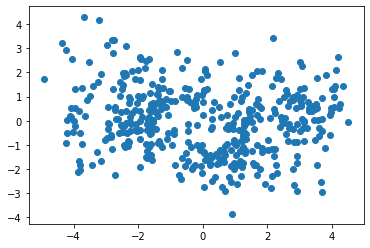

In [45]:
plt.scatter(x_spca[:,0], x_spca[:,1])

In [46]:
cluster_s = KMeans(n_clusters = 8, random_state = 42) 
cluster_s.fit(x_spca) 

cluster_means_s = cluster_s.predict(x_spca)

Text(0.5, 1.0, 'SPCA of All-Star Players')

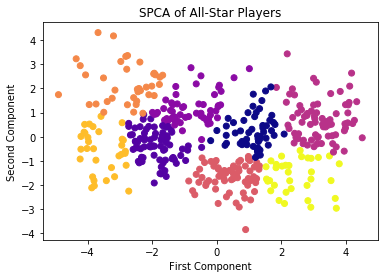

In [47]:
plt.scatter(x_spca[:,0],x_spca[:,1] , c=cluster_means_s, cmap = 'plasma')
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("SPCA of All-Star Players")

In [48]:
allstar_stats['cluster_s'] = cluster_s.labels_

allstar_stats[allstar_stats["cluster_s"] == 6]

player_name   age  player_height  player_weight  gp   pts   reb  \
15   Shaquille O'Neal  28.0         215.90     142.881480  79  29.7  13.6   
22         Tim Duncan  24.0         213.36     117.933920  74  23.2  12.4   
36    Alonzo Mourning  31.0         208.28     118.387512  13  13.6   7.8   
44         Tim Duncan  25.0         213.36     117.933920  82  22.2  12.2   
52   Shaquille O'Neal  29.0         215.90     142.881480  74  28.7  12.7   
59         Tim Duncan  26.0         213.36     117.933920  82  25.5  12.7   
66   Shaquille O'Neal  30.0         215.90     142.881480  67  27.2  10.7   
87   Shaquille O'Neal  31.0         215.90     151.953320  67  27.5  11.1   
92         Tim Duncan  27.0         213.36     117.933920  81  23.3  12.9   
107        Tim Duncan  28.0         213.36     117.933920  69  22.3  12.4   
110          Yao Ming  23.0         228.60     140.613520  82  17.5   9.0   
115  Shaquille O'Neal  32.0         215.90     154.221280  67  21.5  11.5   
130        Tim Duncan  29.0         210.82     117.933920  66  20.3  11.1   
132          Yao Ming  24.0         228.60     140.613520  80  18.3   8.4   
138  Shaquille O'Neal  33.0         215.90     147.417400  73  22.9  10.4   
158          Yao Ming  25.0         228.60     140.613520  57  22.3  10.2   
163  Shaquille O'Neal  34.0         215.90     147.417400  59  20.0   9.2   
179     Dwight Howard  21.0         210.82     120.201880  82  17.6  12.3   
188     Carlos Boozer  25.0         205.74     120.655472  74  20.9  11.7   
197          Yao Ming  26.0         228.60     140.613520  48  25.0   9.4   
204     Dwight Howard  22.0         210.82     120.201880  82  20.7  14.2   
222        Tim Duncan  32.0         210.82     117.933920  78  19.3  11.3   
224          Yao Ming  27.0         228.60     140.613520  55  22.0  10.8   
231     Dwight Howard  23.0         210.82     120.201880  79  20.6  13.8   
264     Dwight Howard  24.0         210.82     120.201880  82  18.3  13.2   
283        Kevin Love  22.0         208.28     117.933920  73  20.2  15.2   
290     Dwight Howard  25.0         210.82     120.201880  78  22.9  14.1   
307     Dwight Howard  26.0         210.82     120.201880  54  20.6  14.5   
344        Kevin Love  24.0         208.28     117.933920  18  18.3  14.0   
363  DeMarcus Cousins  23.0         210.82     122.469840  71  22.7  11.7   
384  DeMarcus Cousins  24.0         210.82     122.469840  59  24.1  12.7   
426  DeMarcus Cousins  25.0         210.82     122.469840  65  26.9  11.5   

     ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  allstar  \
15   3.8        11.0     0.116     0.246    0.313   0.578    0.184        1   
22   3.2         9.5     0.109     0.244    0.286   0.555    0.152        1   
36   0.9         5.9     0.142     0.232    0.301   0.536    0.079        1   
44   3.0        12.3     0.097     0.246    0.287   0.536    0.150        1   
52   3.7         7.9     0.116     0.247    0.318   0.574    0.177        1   
59   3.7         8.7     0.097     0.257    0.291   0.576    0.182        1   
66   3.0        11.5     0.110     0.211    0.318   0.590    0.157        1   
87   3.1         6.9     0.120     0.214    0.303   0.602    0.150        1   
92   3.9         9.1     0.100     0.268    0.279   0.564    0.191        1   
107  3.1        11.3     0.103     0.276    0.300   0.534    0.170        1   
110  1.5         3.6     0.093     0.220    0.252   0.586    0.090        1   
115  2.9         8.3     0.114     0.232    0.260   0.578    0.140        1   
130  2.7        16.7     0.111     0.277    0.291   0.540    0.151        1   
132  0.8         2.0     0.102     0.215    0.264   0.614    0.048        1   
138  2.7        10.8     0.124     0.224    0.303   0.583    0.149        1   
158  1.5         1.4     0.093     0.248    0.298   0.592    0.092        1   
163  1.9         6.9     0.121     0.232    0.299   0.586    0.111        1   
179  1.9         0.7     0.120     0.288    0.